In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import pandas as pd

import os
import sys

notebook_dir = os.getcwd()  

emotions_dir   = os.path.abspath(os.path.join(notebook_dir, "..", "..", "emotions"))

evaluation_dir = os.path.abspath(os.path.join(notebook_dir, ".."))

for d in (emotions_dir, evaluation_dir):
    if d not in sys.path:
        sys.path.insert(0, d)

from emotions import emotions_labels
from utils import predict_one, load_similarity_matrix, plot_confusion, predict_two, align_predictions_with_labels

/home/camila/anaconda3/envs/NLP/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
RESULTS_STORAGE_PATH = "sentiment_results"
CSV_PROMPTS_PATH = "eval_prompts.csv"
CSV_LYRICS_LABELS_PATH = "eval_lyrics_labels.csv"
IDX = {lbl: i for i, lbl in enumerate(emotions_labels)}

## Hard evaluation

                                                text       label  \
0  Watching my teammate stay late to coach the in...  admiration   
1  That clip of a golden retriever chasing bubble...   amusement   
2  The courier dumped my brand-new keyboard in a ...       anger   
3  The elevator keeps dinging on every floor even...   annoyance   
4  My colleague refactored the legacy code and no...    approval   

             pred  
0      admiration  
1       amusement  
2       annoyance  
3  disappointment  
4        approval  
Hard accuracy : 0.324


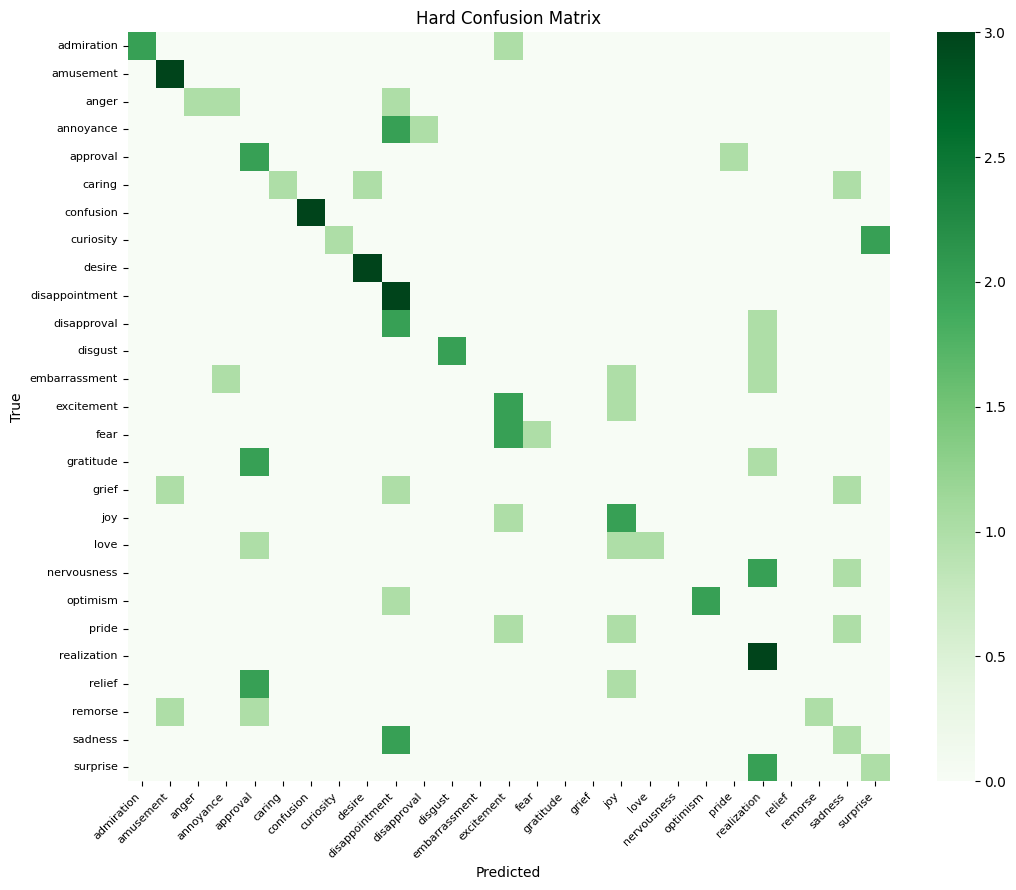

In [3]:
df = pd.read_csv(CSV_PROMPTS_PATH)
df["pred"] = df["text"].apply(predict_one)
print(df.head())
y_true = df["label"].values
y_pred = df["pred"].values
hard_acc = accuracy_score(y_true, y_pred)
hard_cm  = confusion_matrix(y_true, y_pred, labels=emotions_labels)

print(f"Hard accuracy : {hard_acc:.3f}")
plot_confusion(hard_cm, emotions_labels,
                title="Hard Confusion Matrix",
                fname=os.path.join(RESULTS_STORAGE_PATH, "cm_hard.png"),
                vmax=hard_cm.max())

In [4]:
report = classification_report(df["label"], df["pred"], digits=3, zero_division=0)
report_path = os.path.join(RESULTS_STORAGE_PATH, "classification_report.txt")
with open(report_path, "w") as f:
    f.write(report)
print(f"Classification report saved to {report_path}")
print("report:")
print(report)

Classification report saved to sentiment_results/classification_report.txt
report:
                   precision    recall  f1-score   support

     "admiration"      0.000     0.000     0.000         1
      "amusement"      0.000     0.000     0.000         1
          "anger"      0.000     0.000     0.000         1
      "annoyance"      0.000     0.000     0.000         1
       "approval"      0.000     0.000     0.000         1
         "caring"      0.000     0.000     0.000         1
      "confusion"      0.000     0.000     0.000         1
      "curiosity"      0.000     0.000     0.000         1
         "desire"      0.000     0.000     0.000         1
 "disappointment"      0.000     0.000     0.000         1
    "disapproval"      0.000     0.000     0.000         1
        "disgust"      0.000     0.000     0.000         1
  "embarrassment"      0.000     0.000     0.000         1
     "excitement"      0.000     0.000     0.000         1
           "fear"      0.000   

## Soft evaluation

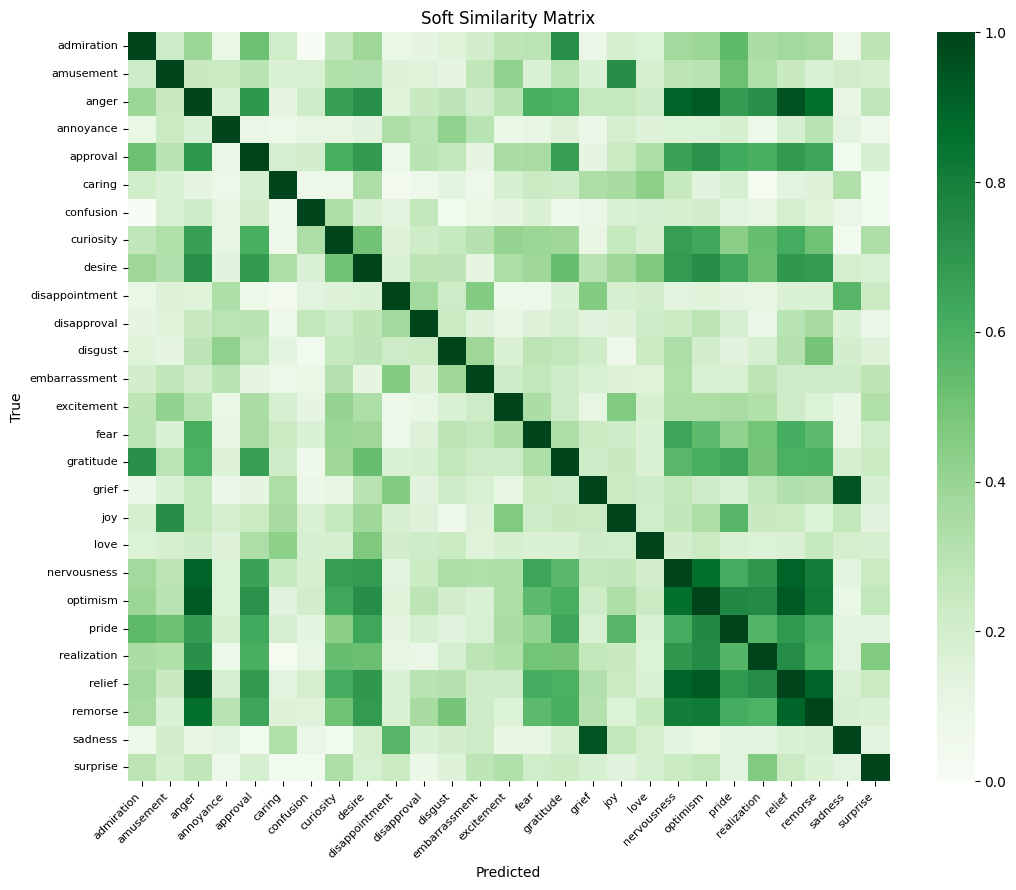

Soft accuracy : 0.683


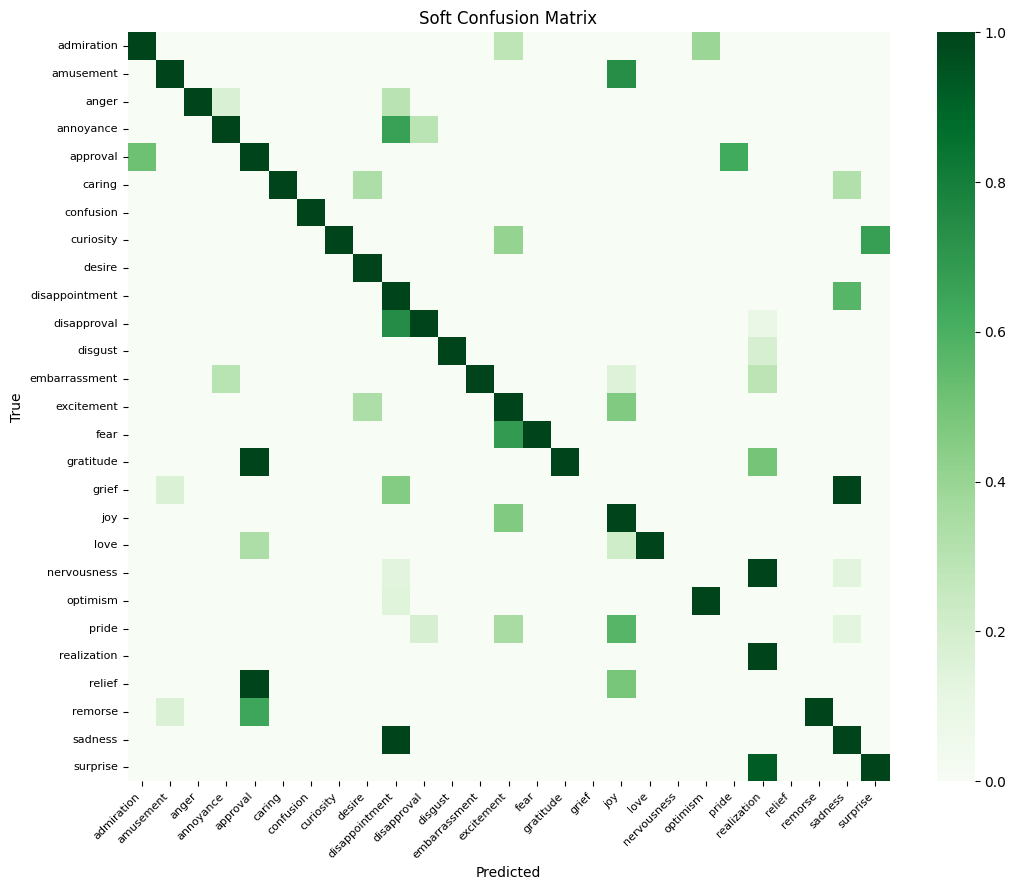

In [5]:
S = load_similarity_matrix()
plot_confusion(S, emotions_labels,
                title="Soft Similarity Matrix",
                fname=os.path.join(RESULTS_STORAGE_PATH, "cm_soft_similarity.png"),
                vmax=S.max(), save=False)

y_true = [label.strip().replace('"', '') for label in y_true]

soft_scores = [S[IDX[t], IDX[p]] for t, p in zip(y_true, y_pred)]
soft_acc    = np.mean(soft_scores)
print(f"Soft accuracy : {soft_acc:.3f}")
soft_cm = np.zeros_like(S)
for t, p in zip(y_true, y_pred):
    soft_cm[IDX[t], IDX[p]] += S[IDX[t], IDX[p]]

plot_confusion(soft_cm, emotions_labels,
                title="Soft Confusion Matrix",
                fname=os.path.join(RESULTS_STORAGE_PATH, "cm_soft.png"), vmax=1.0)

df.to_csv(os.path.join(RESULTS_STORAGE_PATH, "eval_prompts_with_preds.csv"), index=False)

## Etapa 2: Sentimientos de las canciones

In [6]:
#Para elegir canciones aleatorias del Dataset Genius y tomar sus letras:

#df_songs = pd.read_csv("../../data/dataset_genius.csv")
#df_lyrics = df_songs[["lyrics"]]
# tomar 100 muestras aleatorias de df_lyrics
#df_lyrics_sample = df_lyrics.sample(n=100, random_state=42)
#df_lyrics_sample.to_csv("lyrics_sample.csv", index=True)

In [7]:
df = pd.read_csv("eval_lyrics_labels.csv")
print(df.head())
print(df.columns)

                                               lyric          label1  \
0  you re wondering if i care about ya or if ther...            love   
1  the youth have been tricked into war because t...           anger   
2  it s never easy to see the sun when you re loc...         sadness   
3  what makes him stand and fight when he only wa...  disappointment   
4  if i be so inclined to climb up beside you wou...          desire   

           label2  
0          caring  
1     disapproval  
2  disappointment  
3         remorse  
4       confusion  
Index(['lyric', 'label1', 'label2'], dtype='object')


Token indices sequence length is longer than the specified maximum sequence length for this model (941 > 512). Running this sequence through the model will result in indexing errors


y_true_flat: ['caring', 'love', 'anger', 'disapproval', 'sadness', 'disappointment', 'disappointment', 'remorse', 'desire', 'confusion', 'love', 'relief', 'optimism', 'curiosity', 'anger', 'confusion', 'disappointment', 'pride', 'caring', 'relief', 'desire', 'fear ', 'sadness', 'pride', 'annoyance', 'desire', 'love', 'excitement', 'confusion', 'realization', 'disgust', 'fear', 'love', 'gratitude', 'disapproval', 'realization', 'grief', 'sadness', 'fear', 'anger', 'embarrassment', 'love', 'anger', 'disgust', 'confusion', 'sadness', 'grief', 'remorse', 'love', 'desire', 'amusement', 'confusion', 'desire', 'excitement', 'grief', 'fear', 'anger', 'disgust', 'grief', 'remorse', 'disappointment', 'disapproval', 'pride', 'joy', 'fear', 'anger', 'joy', 'love', 'desire', 'curiosity', ' love', ' admiration ', ' love', ' remorse', ' optimism', ' curiosity', ' excitement', ' anger', ' sadness', ' grief', ' grief', ' sadness', ' anger', ' disapproval', ' disapproval', ' desire', ' fear', ' love', '

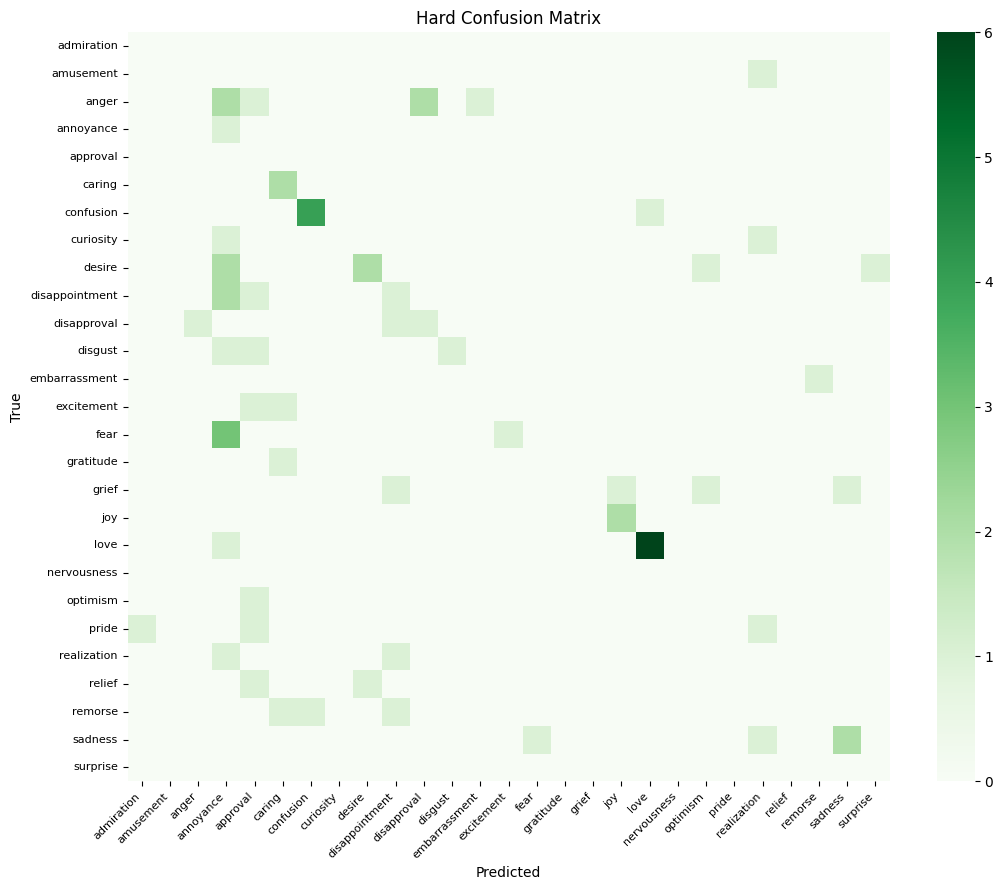

In [8]:
df = pd.read_csv(CSV_LYRICS_LABELS_PATH)
df["pred"] = df["lyric"].apply(predict_two)  # predict_two devuelve una lista de dos emociones


# Separar las etiquetas verdaderas
y_true_label1 = df["label1"].values
y_true_label2 = df["label2"].values

# Combinar las etiquetas verdaderas en pares
y_true = list(zip(y_true_label1, y_true_label2))  # Combinar las etiquetas en pares

y_pred = df["pred"].values 


# Reordenar las etiquetas verdaderas y predichas para que estén alineadas
aligned_pairs = [align_predictions_with_labels(pred, real) for pred, real in zip(y_pred, y_true)]

# Separar las predicciones y etiquetas reales alineadas
y_pred_aligned = [pair[0] for pair in aligned_pairs]
y_true_aligned = [pair[1] for pair in aligned_pairs]

# Aplanar las etiquetas después de reordenarlas
y_true_flat = [label for pair in y_true_aligned for label in pair]
y_pred_flat = [label for pair in y_pred_aligned for label in pair]

print(f"y_true_flat: {y_true_flat}")
print(f"y_pred_flat: {y_pred_flat}")

hard_acc = accuracy_score(y_true_flat, y_pred_flat)
print(f"Hard accuracy : {hard_acc:.3f}")

# Generar matriz de confusión
hard_cm = confusion_matrix(y_true_flat, y_pred_flat, labels=emotions_labels)



plot_confusion(
    hard_cm, emotions_labels,
    title="Hard Confusion Matrix",
    fname=os.path.join(RESULTS_STORAGE_PATH, "lyrics_hard_acc.png"),
    vmax=hard_cm.max()
)

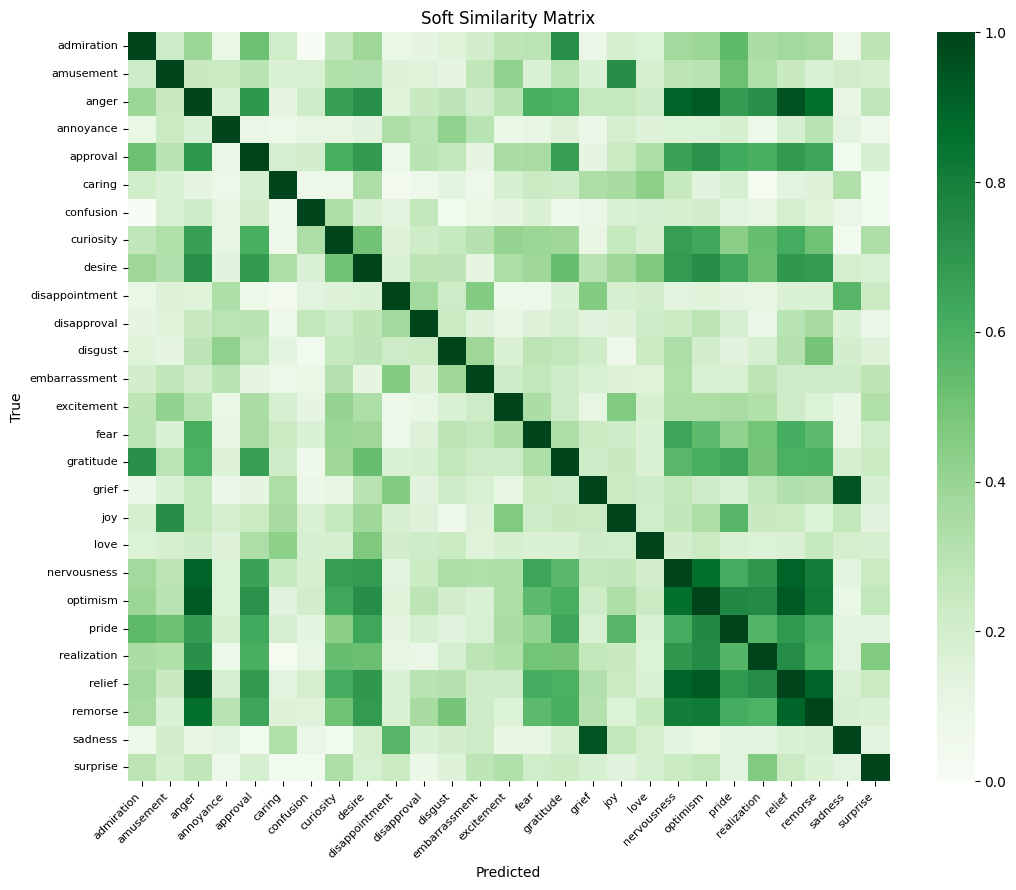

Soft accuracy : 0.473


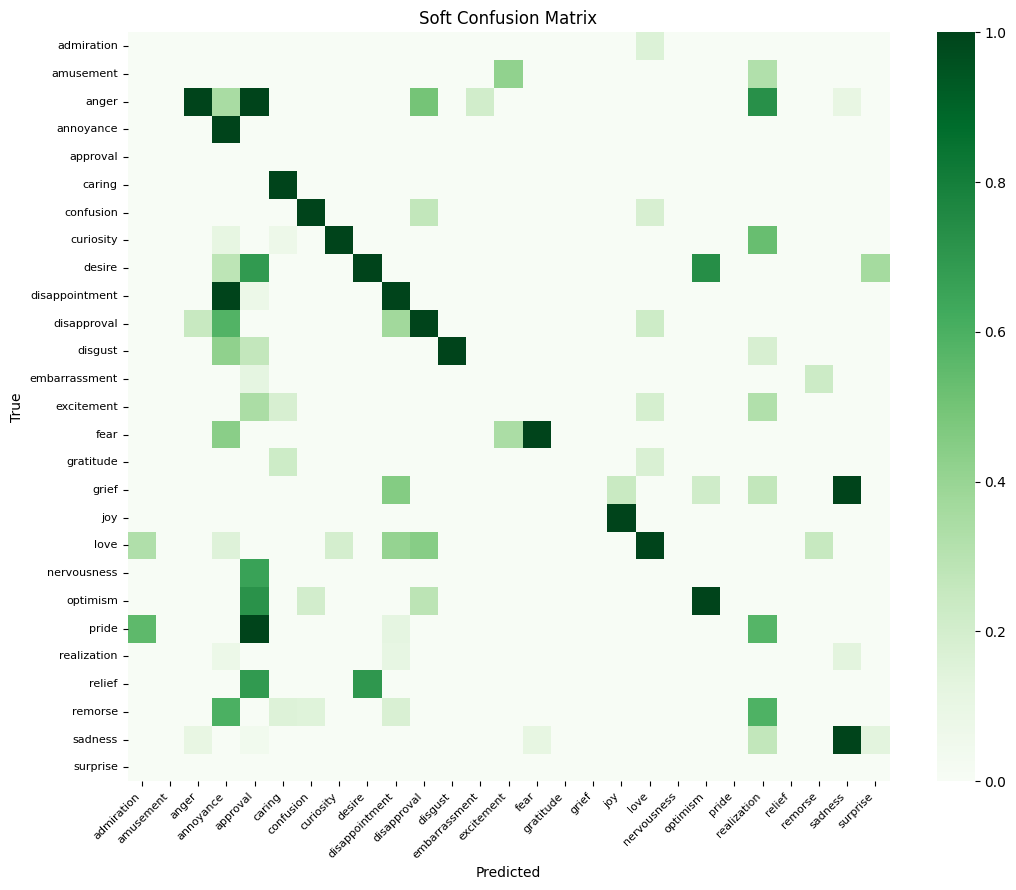

In [9]:
S = load_similarity_matrix()
plot_confusion(S, emotions_labels,
                title="Soft Similarity Matrix",
                fname=os.path.join(RESULTS_STORAGE_PATH, "lyrics_soft_similarity.png"),
                vmax=S.max(), save=False)

y_true_aligned = [[label.strip() for label in pair] for pair in y_true_aligned]
y_pred_aligned = [[label.strip() for label in pair] for pair in y_pred_aligned]

soft_scores = [S[IDX[t], IDX[p]] for t_pair, p_pair in zip(y_true_aligned, y_pred_aligned) for t, p in zip(t_pair, p_pair)]
soft_acc  = np.mean(soft_scores)
print(f"Soft accuracy : {soft_acc:.3f}")
soft_cm = np.zeros_like(S)
for t_pair, p_pair in zip(y_true_aligned, y_pred_aligned):
    for t, p in zip(t_pair, p_pair):
        soft_cm[IDX[t], IDX[p]] += S[IDX[t], IDX[p]]

plot_confusion(soft_cm, emotions_labels,
                title="Soft Confusion Matrix",
                fname=os.path.join(RESULTS_STORAGE_PATH, "lyrics_soft.png"), vmax=1.0)

# Guardar el DataFrame con las predicciones
df.to_csv(os.path.join(RESULTS_STORAGE_PATH, "eval_prompts_with_preds.csv"), index=False)